In [1]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [2]:
df = pd.read_csv('./olist_dataset.csv')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-

Pour simplifier notre travail d'étude, nous supprimons les doublons de commandes, en effet certaines commandes comportants le même identifiant sont scindées en plusieurs petits achats. Pour l'instant nous ne nous intéressons qu'aux profils des clients et pouvons simplifier le dataset en supprimant les individus qui sont des doublons de commande. Dans chaque individus il y a un récapitulatif de la commande globale.

In [3]:
df = df.drop_duplicates(subset=['order_id'])
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,no title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,-19.840168,-43.923299,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,pet_shop
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,no title,no message,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119137,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,

Nous souhaitons effectuer une analyse RFM sur nos différents clients. Nous devons alors créer ces nouvelles variables.
1. **Récence (R - Recency)** : Cela mesure depuis combien de temps un client n'a pas effectué d'achat. Un client qui a acheté récemment est considéré comme plus actif et potentiellement plus engagé.
2. **Fréquence (F - Frequency)** : Cela fait référence à la fréquence à laquelle un client effectue des achats. Un client qui achète régulièrement est souvent considéré comme plus précieux, car il est plus susceptible de rester fidèle à la marque.
3. **Montant (M - Monetary)** : Cela fait référence au montant total dépensé par un client sur une période donnée. Les clients qui dépensent davantage sont généralement considérés comme plus précieux pour l'entreprise.

Pour effectuer une étude de la récence d'achat d'un client, nous prenons en compte la dernière commande de l'ensemble des clients et nous basons notre étude un mois après cette date.

In [4]:
date_recente = df['order_purchase_timestamp'].max()
date_recente

'2018-10-17 17:30:18'

In [5]:
date_etude = pd.to_datetime('2018-11-01 00:00:00')

last_purchase_grouped = df.groupby('customer_unique_id')['order_purchase_timestamp'].max()
df_last_purchase_grouped = pd.DataFrame({'customer_unique_id': last_purchase_grouped.index,
                           'last_purchase': last_purchase_grouped.values})

df = pd.merge(df, df_last_purchase_grouped, on='customer_unique_id', how='left')

df['Recency'] = date_etude - (pd.to_datetime(df['last_purchase']))
df = df.drop(columns={'last_purchase'})

df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,Recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,394 days 13:03:27
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery,99 days 03:18:23
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto,84 days 15:21:11
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,no title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,-19.840168,-43.923299,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,pet_shop,347 days 04:31:54
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,no title,no message,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,stationery,260 days 02:41:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994

Pour la fréquence d'achat d'un client, nous ne prenons en compte que le nombre d'achat totaux que le client a effectué. Les clients ayant commandé majoritairement qu'une seule fois sur la plateforme. Nous aurons probablement une problème de déséquilibre qu'il faudra prendre en compte dans la suite de notre étude.

In [6]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

occurrences = df['customer_unique_id'].value_counts()
occurrences = occurrences.reset_index()
occurrences.columns = ['customer_unique_id', 'Frequency']
df = pd.merge(df, occurrences, on='customer_unique_id' , how='left')

df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,Recency,Frequency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,394 days 13:03:27,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery,99 days 03:18:23,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto,84 days 15:21:11,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,no title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,-19.840168,-43.923299,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,pet_shop,347 days 04:31:54,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,no title,no message,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,stationery,260 days 02:41:21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Enfin pour ajouter la variable montant, nous prenons le montant total effectué pour chaque commande par chaque client.

In [7]:
df['Total_price'] = df['price'] + df['freight_value']
df['Monetary'] = df.groupby('customer_unique_id')['Total_price'].transform('sum')

In [8]:
df = df.drop(columns={'Total_price'})
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,Recency,Frequency,Monetary
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,394 days 13:03:27,2,82.82
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery,99 days 03:18:23,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto,84 days 15:21:11,1,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,no title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,-19.840168,-43.923299,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,pet_shop,347 days 04:31:54,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,no title,no message,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,stationery,260 days 02:41:21,1,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Enfin nous ne nous intéressons qu'aux profil des clients, les informations relatives aux commandes sont pris en compte dans les nouvelles variables que nous avons créé. Nous pouvons alors supprimer les différents achats des clients pour ne conserver que les clients uniques.

In [9]:
df_clients = df.drop_duplicates(subset=['customer_unique_id'])
df_clients

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,Recency,Frequency,Monetary
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,394 days 13:03:27,2,82.82
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery,99 days 03:18:23,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto,84 days 15:21:11,1,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,no title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,-19.840168,-43.923299,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,pet_shop,347 days 04:31:54,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,no title,no message,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,stationery,260 days 02:41:21,1,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Et pour finir nous créons un nouveau dataframe qui prend en compte le client et les variables RFM qui le caractérisent.


In [10]:
df_clients = df_clients[['customer_id', 'Recency', 'Frequency', 'Monetary']]
df_clients

,customer_id,Recency,Frequency,Monetary
0,9ef432eb6251297304e76186b10a928d,394 days 13:03:27,2,82.82
1,b0830fb4747a6c6d20dea0b8c802d7ef,99 days 03:18:23,1,141.46
2,41ce2a54c0b03bf3443c3d931a367089,84 days 15:21:11,1,179.12
3,f88197465ea7920adcdbec7375364d82,347 days 04:31:54,1,72.20
4,8ab97904e6daea8866dbdbc4fb7aad2c,260 days 02:41:21,1,28.62
...,...,...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,601 days 14:05:55,1,85.08
99437,1fca14ff2861355f6e5f14306ff977a7,267 days 11:01:02,1,195.00
99438,1aa71eb042121263aafbe80c1b562c9c,430 days 09:13:17,1,271.01
99439,b331b74b18dc79bcdf6532d51e1637c1,296 days 02:31:33,1,220.58


## Etude de la distribution RFM

Nous pouvons désormais étudier la distribution de ces variables

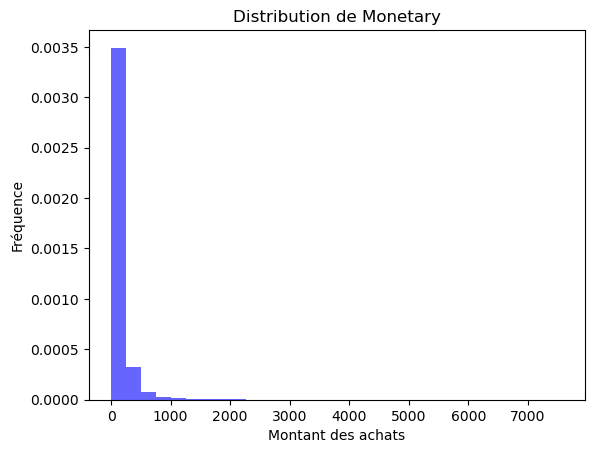

In [11]:
plt.hist(df_clients['Monetary'], bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution de Monetary')
plt.xlabel('Montant des achats')
plt.ylabel('Fréquence')
plt.show()

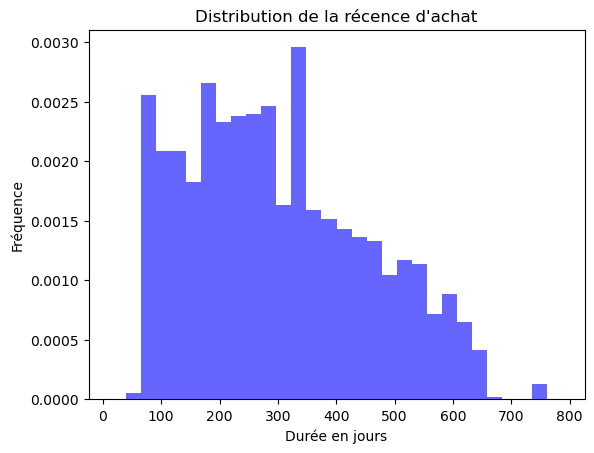

In [12]:
df_clients['Recency'] = df_clients['Recency'].dt.days

plt.hist(df_clients['Recency'], bins=30, density=True, alpha=0.6, color='b')
plt.title("Distribution de la récence d'achat")
plt.xlabel('Durée en jours')
plt.ylabel('Fréquence')
plt.show()

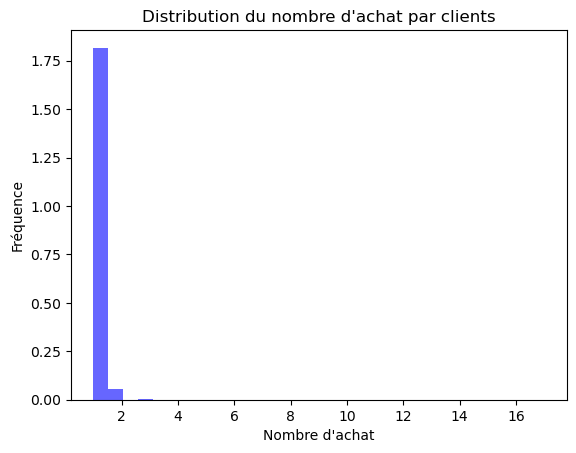

In [13]:
plt.hist(df_clients['Frequency'], bins=30, density=True, alpha=0.6, color='b')
plt.title("Distribution du nombre d'achat par clients")
plt.xlabel("Nombre d'achat")
plt.ylabel('Fréquence')
plt.show()

In [14]:
from scipy.stats import shapiro
data = df_clients['Monetary']
stat, p= shapiro(data)
print('stat=%.3f, p=%.3f'% (stat, p))
if p> 0.05:
       print('Probably Gaussian')
else:
       print('Probably not Gaussian')

stat=0.488, p=0.000
Probably not Gaussian


In [15]:
from scipy.stats import shapiro
data = df_clients['Recency']
stat, p= shapiro(data)
print('stat=%.3f, p=%.3f'% (stat, p))
if p> 0.05:
       print('Probably Gaussian')
else:
       print('Probably not Gaussian')

stat=0.962, p=0.000
Probably not Gaussian


In [16]:
from scipy.stats import shapiro
data = df_clients['Frequency']
stat, p= shapiro(data)
print('stat=%.3f, p=%.3f'% (stat, p))
if p> 0.05:
       print('Probably Gaussian')
else:
       print('Probably not Gaussian')

stat=0.147, p=0.000
Probably not Gaussian


In [17]:
print(df_clients['Frequency'].skew())
print(df_clients['Recency'].skew())
print(df_clients['Monetary'].skew())

11.862593280003079
0.44545196787940106
7.588782500346365


## Transformation de la distribution RFM

Ces variables n'étant pas normalement distribuées nous effectuons une transformation de leur distribution pour faciliter le travail de cluestering.

## Variable MONETARY

In [18]:
df_clients['Monetary'] = df_clients['Monetary'] + 1
df_clients['Monetary'] = np.log(df_clients['Monetary'])

In [19]:
#df_clients['Monetary'] = np.log(df_clients['Monetary'])
#df_clients
#df_without_naninf = df_clients[df_clients['Monetary'] > 0].copy()
#df_without_naninf.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
#df_without_naninf = df_without_naninf.dropna(subset=['Monetary'])

In [20]:
df_clients['Monetary'] = np.log(df_clients['Monetary'])
df_clients= df_clients[df_clients['Monetary'] > 0]
df_clients.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
df_clients = df_clients.dropna(subset=['Monetary'])

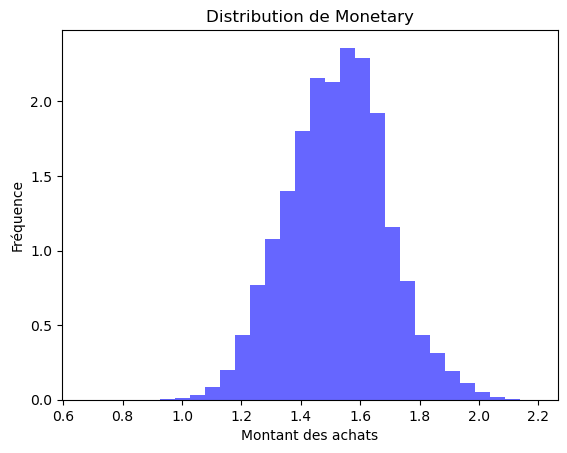

In [21]:
plt.hist(df_clients['Monetary'], bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution de Monetary')
plt.xlabel('Montant des achats')
plt.ylabel('Fréquence')
plt.show()

## Variable RECENCY

Pour cette variable, la transformation logarithmique n'est pas concluante. Nous effectuons alors une transformation Box-Cox, c'est une méthode statistique qui vise à stabiliser la variance et à rendre les données plus normalement distribuées.

In [22]:
from scipy import stats

df_clients['Recency'], _ = stats.boxcox(df_clients['Recency'])

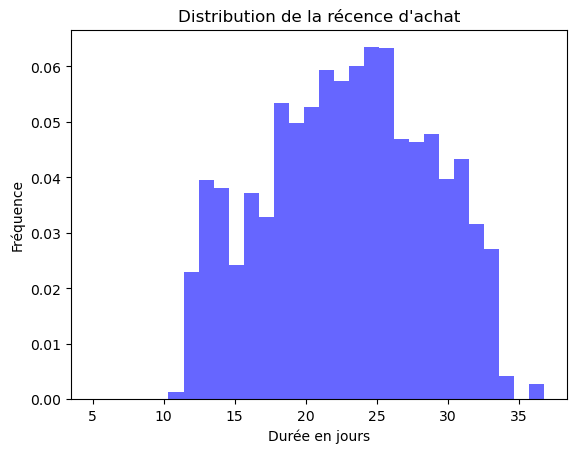

In [23]:
plt.hist(df_clients['Recency'], bins=30, density=True, alpha=0.6, color='b')
plt.title("Distribution de la récence d'achat")
plt.xlabel('Durée en jours')
plt.ylabel('Fréquence')
plt.show()

## Variable FREQUENCY 

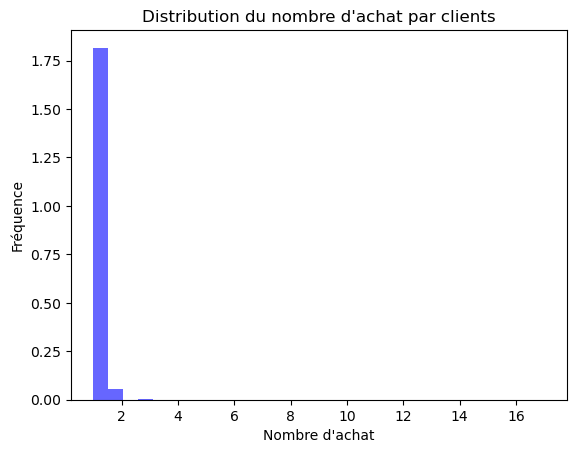

In [24]:
plt.hist(df_clients['Frequency'], bins=30, density=True, alpha=0.6, color='b')
plt.title("Distribution du nombre d'achat par clients")
plt.xlabel("Nombre d'achat")
plt.ylabel('Fréquence')
plt.show()

Impossible de modifier la distribution de la variable Frequency, l'algorithme que nous utilisons est moins sensible aux déséquilibres de distribution nous pouvons laisser cette variable tel qu'elle.

In [25]:
df_clients

,customer_id,Recency,Frequency,Monetary
0,9ef432eb6251297304e76186b10a928d,26.906558,2,1.488100
1,b0830fb4747a6c6d20dea0b8c802d7ef,14.017321,1,1.601216
2,41ce2a54c0b03bf3443c3d931a367089,12.924112,1,1.647432
3,f88197465ea7920adcdbec7375364d82,25.385337,1,1.457031
4,8ab97904e6daea8866dbdbc4fb7aad2c,22.215955,1,1.220373
...,...,...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,32.588038,1,1.494089
99437,1fca14ff2861355f6e5f14306ff977a7,22.491884,1,1.663569
99438,1aa71eb042121263aafbe80c1b562c9c,28.001795,1,1.723809
99439,b331b74b18dc79bcdf6532d51e1637c1,23.592444,1,1.686544


In [26]:
RFM_dataset = 'RFM_dataset.csv'
df_clients.to_csv(RFM_dataset, index=False)